In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv('HousingData.csv')

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
dataset.rename(columns={'MEDV':'Price'},inplace=-True)

In [17]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [15]:
dataset = dataset.dropna()

In [19]:
dataset.shape

(394, 14)

In [21]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


In [23]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [37]:
from sklearn.linear_model import LinearRegression

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regression=RandomForestRegressor()

In [83]:
regression.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
reg_pred=regression.predict(X_test)

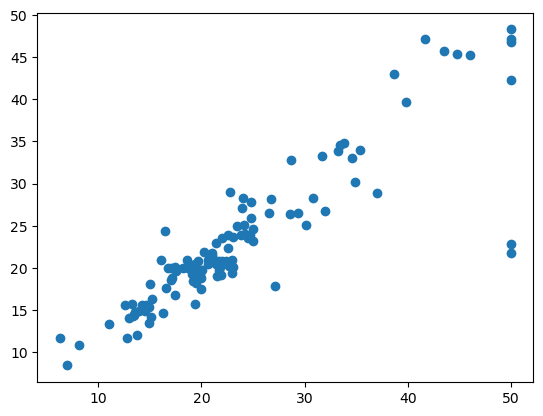

In [87]:
plt.scatter(y_test,reg_pred)

In [89]:
residuals=y_test-reg_pred

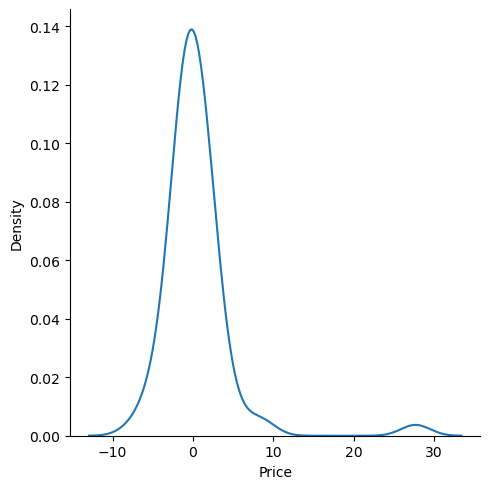

In [91]:
import seaborn as sns
sns.displot(residuals,kind="kde")

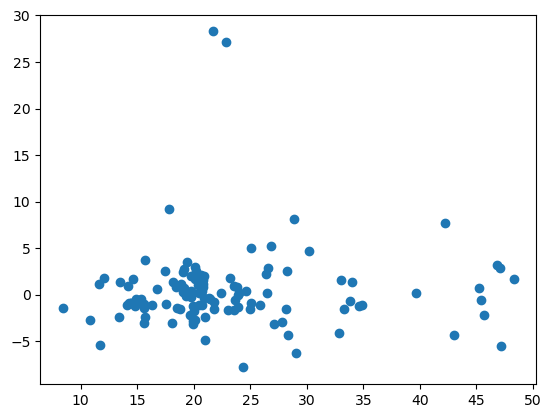

In [93]:
plt.scatter(reg_pred,residuals)

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

2.4034033613445382
19.798507268907564
4.449551355913039


In [97]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7877684036969024


In [105]:
from xgboost import XGBRegressor

In [108]:
model=XGBRegressor()

In [110]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
reg_pred1=model.predict(X_test)

In [114]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred1)
print(score)

0.7838392024277021


In [116]:
### Dynamic input values

In [142]:
data = dataset.sample(1)

In [144]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
476,4.87141,0.0,18.1,0.0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7


In [146]:
data.drop(columns=['Price'],inplace=True)

In [148]:
data = scaler.transform(data)

In [150]:
data

array([[ 0.06282952, -0.48865541,  1.04820426, -0.26464865,  0.50735598,
         0.31769553,  0.86352113, -0.70468802,  1.64259467,  1.51156433,
         0.75829743,  0.44102163,  0.76712608]])

In [152]:
dynamic_pred =regression.predict(data)

In [154]:
dynamic_pred

array([16.348])

In [156]:
import pickle

In [158]:
pickle.dump(regression,open('regmodel.pkl','wb'))